In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json

import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd

#import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import shutil
import keras
from PIL import Image
#import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re
import string

from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Lambda, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Input
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE
from sklearn.metrics import confusion_matrix
import random

AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 32
EPOCHS = 50
CROP_TO = 32
SEED = 26

PROJECT_DIM = 128
LATENT_DIM = 512
WEIGHT_DECAY = 0.0005
learning_rate = 0.0001
batch_size = 128
hidden_units = 512
projection_units = 256
num_epochs = 2
dropout_rate = 0.5

temperature = 0.05

C:\Users\chowd\AppData\Roaming\Python\Python39\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.7.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [ ]:
!pip install tensorflow-addons

In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [3]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print('GPU found')
    print('GPU device name: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU found")


GPU found
GPU device name: /device:GPU:0


In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255
test_images = test_images / 255

X_train, x_unlab, Y_train, y_unlab = train_test_split( train_images, train_labels , test_size=0.6, random_state=42 )
X_test = test_images
Y_test = test_labels

In [5]:
np.shape(Y_train)

(20000, 1)

In [5]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.Normalization(),
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.02),
        layers.experimental.preprocessing.RandomWidth(0.2),
        layers.experimental.preprocessing.RandomHeight(0.2),
    ]
)

# Setting the state of the normalization layer.
data_augmentation.layers[0].adapt(X_train)

In [6]:


num_classes = 10
input_shape = (32, 32, 3)

def create_encoder():
    resnet = tf.keras.applications.ResNet50V2( include_top=False, weights="imagenet", input_shape=input_shape, pooling="avg" )

    inputs = keras.Input(shape=input_shape)
    augmented = data_augmentation(inputs)
    outputs = resnet(augmented)
    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10-encoder")
    return model

encoder = create_encoder()
encoder.summary()


Model: "cifar10-encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     7         
                                                                 
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
Total params: 23,564,807
Trainable params: 23,519,360
Non-trainable params: 45,447
_________________________________________________________________


In [7]:
def create_classifier(encoder, trainable=True):

    for layer in encoder.layers:
        layer.trainable = trainable

    inputs = keras.Input(shape=input_shape)
    features = encoder(inputs)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units, activation="relu")(features)
    features = layers.Dropout(dropout_rate)(features)
    outputs = layers.Dense(num_classes, activation="softmax")(features)

    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10-classifier")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )
    return model

In [8]:
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=1, name=None):
        super(SupervisedContrastiveLoss, self).__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):

        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)

        logits = tf.divide( tf.matmul(  
            feature_vectors_normalized, tf.transpose(feature_vectors_normalized)),self.temperature,)
        
        return tfa.losses.npairs_loss(tf.squeeze(labels), logits)


def add_projection_head(encoder):
    
    inputs = keras.Input(shape=input_shape)
    features = encoder(inputs)
    outputs = layers.Dense(projection_units, activation="relu")(features)
    model = keras.Model(
        inputs=inputs, outputs=outputs, name="cifar-encoder_with_projection-head"
    )
    
    return model

In [7]:
encoder = create_encoder()

encoder_with_projection_head = add_projection_head(encoder)

encoder_with_projection_head.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=SupervisedContrastiveLoss(temperature),
)

encoder_with_projection_head.summary()

history = encoder_with_projection_head.fit(
    x=X_train, y=Y_train, batch_size=batch_size, epochs=2)

Model: "cifar-encoder_with_projection-head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 cifar10-encoder (Functional  (None, 2048)             23564807  
 )                                                               
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
Total params: 24,089,351
Trainable params: 24,043,904
Non-trainable params: 45,447
_________________________________________________________________
Epoch 1/2
313/313 [==============================] - 66s 151ms/step - loss: 4.0042
Epoch 2/2
 22/313 [=>............................] - ETA: 30s - loss: 3.9211

KeyboardInterrupt: 

In [12]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [13]:
tf.test.is_gpu_available()

True

In [116]:
classifier = create_classifier(encoder, trainable=False) 

history = classifier.fit(x=X_train, y=Y_train, batch_size=batch_size, epochs=num_epochs) 

accuracy = classifier.evaluate(X_test, Y_test)[1] 
print(f"Test accuracy: {round(accuracy * 100, 2)}%") 

Epoch 1/2
157/157 [==============================] - 13s 47ms/step - loss: nan - sparse_categorical_accuracy: 0.1015
Epoch 2/2
157/157 [==============================] - 4s 21ms/step - loss: nan - sparse_categorical_accuracy: 0.1044
Test accuracy: 10.44%


In [13]:
# Helper function for merging new history objects with older ones
def append_history(losses, val_losses, accuracy, val_accuracy, history):
    losses = losses + history.history["loss"]
    val_losses = val_losses + history.history["val_loss"]
    accuracy = accuracy + history.history["accuracy"]
    val_accuracy = val_accuracy + history.history["val_accuracy"]
    return losses, val_losses, accuracy, val_accuracy


# Plotter function
def plot_history(losses, val_losses, accuracies, val_accuracies):
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(["train_loss", "val_loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(["train_accuracy", "val_accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

In [ ]:


def resmodel():
    
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3),))
    model.add(layers.Conv2D(64, (3, 3),))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3),))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(.2))
    model.add(layers.Flatten()) 
    model.add(layers.Dense(32))

    model.summary()
    return model

In [14]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE

def create_model(X,Y,X_test, Y_test,num_epochs):
    
    data_augmentation.layers[0].adapt(X)
    
    encoder = create_encoder()

    encoder_with_projection_head = add_projection_head(encoder)
    
    encoder_with_projection_head.compile(optimizer=keras.optimizers.Adam(learning_rate),
                                     loss=SupervisedContrastiveLoss(temperature),)
    
    
    history = encoder_with_projection_head.fit(x=X, y=Y, batch_size=256, epochs=num_epochs)
    
    
    classifier = create_classifier(encoder, trainable=False) 

    history = classifier.fit(x=X, y=Y, batch_size=batch_size, epochs=num_epochs) 

    accuracy = classifier.evaluate(X_test, Y_test)[1] 
    
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return encoder,classifier

In [8]:
arr = np.concatenate((X_train, x_unlab))
X_all = arr
arr = np.concatenate((Y_train, y_unlab))
Y_all = arr

In [ ]:
# callbacks=[keras.callbacks.EarlyStopping(patience=4, verbose=1), ],

def train_full_model(X_train, X_test, Y_train, Y_test,num):
    
    X_train, Y_train = shuffle(X_train, Y_train)
    
    encoder,classifier = create_model(X_train,Y_train,X_test, Y_test,num)

    accuracy = classifier.evaluate(X_test, Y_test)[1] 
    print(f"Test accuracy: {round(accuracy * 100, 2)}%") 
    
    
    return encoder,classifier


encoder,classifier = train_full_model(X_all, X_test, Y_all, Y_test,1)

In [ ]:
encoder,classifier = train_full_model(X_train, X_test, Y_train, Y_test,5)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

def train_active_learning_models(encoder,classifier,X_train,Y_train,x_unlab,y_unlab,X_test,Y_test,num_iterations,num_epochs=1):

    l = len(y_unlab)
    d = int ( np.round ( l/num_iterations ) )
    
    for iteration in range(num_iterations):
        
        l = len(y_unlab)
        
        print("\n\n")
        
        print("Iteration : ")
        
        print(iteration+1)
        
        print("\n\n")

  
        try :
            x_ulb = encoder.predict(x_unlab, batch_size=128)
        except Exception as e:
            print(e)
            return encoder, classifier,X_train,Y_train,x_unlab,y_unlab
        
        print(np.shape(x_ulb))


        nn_clusters = 10
        
        budget =  200
        print("\n")
        print("Annotated in each iter : ")
        print(budget*10)

    
        kmeans = KMeans(n_clusters=nn_clusters, init='k-means++', n_init=10).fit(x_ulb)

        annotate_indices = []
        
        
        for i in range(10):
            
            cluster_center = kmeans.cluster_centers_[i]
            
            cluster_indices = np.where(kmeans.labels_ == i)[0]
            
            distances = np.linalg.norm(x_ulb[cluster_indices] - cluster_center, axis=1)
            
            annotate = cluster_indices[np.argsort(distances,-1)[:budget]]
            
            pts = cluster_indices[np.argsort(distances,-1)[:1]]
            
            annotate_indices.extend(annotate)
            

        print(np.shape(annotate_indices))

        annt = annotate_indices      
        
        ante = x_ulb[annt]
        
        all = list(range(1, l))
        main_list = list(set(all) - set(annt))
        
        new_annt = x_unlab[annt]
        arr = np.concatenate((X_train, new_annt))
        X_train = arr
        
        annt_y = y_unlab[annt]
        arr = np.concatenate((Y_train, annt_y))
        Y_train = arr
        
        
        #create the new unlabelled set
        x_unlab = x_unlab[main_list]

        #create the new unlabelled label set
        y_unlab = y_unlab[main_list]
        
        
        try :
            history = encoder_with_projection_head.fit(x=X_train, y=Y_train, batch_size=256, epochs=10)
        except Exception as e:
            print(e)
            return encoder, classifier,X_train,Y_train,x_unlab,y_unlab
      

        try:
            history = classifier.fit(x=X_train, y=Y_train, batch_size=32, epochs=10) 
        except Exception as e:
            print(e)
            return encoder, classifier,X_train,Y_train,x_unlab,y_unlab

        try :
            accuracy = classifier.evaluate(X_test, Y_test, batch_size=32)[1]
        except Exception as e:
            print(e)
            return encoder, classifier,X_train,Y_train,x_unlab,y_unlab
        
        print("Acc : ")
        print("\n")
        print(accuracy)
       
    
    return encoder, classifier,X_train,Y_train,x_unlab,y_unlab 

from tensorflow.keras.utils import to_categorical
(x_train, y_train),( X_test, Y_test )= cifar10.load_data()
x_train = x_train.astype('float32')
X_test = X_test.astype('float32')
x_train = x_train / 255
X_test = X_test / 255 

X_train, x_unlab, Y_train, y_unlab = train_test_split( x_train,y_train, test_size=0.95, random_state=42 )

data_augmentation.layers[0].adapt(X_train)
encoder = create_encoder()
encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(optimizer=keras.optimizers.Adam(learning_rate),
                        loss=SupervisedContrastiveLoss(temperature))
    
history = encoder_with_projection_head.fit(x=X_train, y=Y_train, batch_size=256, epochs=5)
classifier = create_classifier(encoder, trainable=False) 
history = classifier.fit(x=X_train, y=Y_train, batch_size=32, epochs=10) 

try :
  accuracy = classifier.evaluate(X_test, Y_test, batch_size=32)[1]
except Exception as e:
  print(e)

print("Acc : ")
print("\n")
print(accuracy)
print("\n")
print("\n")


encoder, classifier,X_train,Y_train,x_unlab,y_unlab = train_active_learning_models(encoder, classifier,X_train,Y_train,x_unlab,y_unlab,X_test,Y_test,num_iterations=10)


In [11]:
len(x_unlab)

25000

In [9]:
from tensorflow.keras.utils import to_categorical
(x_train, y_train),( X_test, Y_test )= cifar10.load_data()
x_train = x_train.astype('float32')
X_test = X_test.astype('float32')
x_train = x_train / 255
X_test = X_test / 255 

X_train, x_unlab, Y_train, y_unlab = train_test_split( x_train,y_train, test_size=0.95, random_state=42 )

data_augmentation.layers[0].adapt(X_train)
encoder = create_encoder()
encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(optimizer=keras.optimizers.Adam(learning_rate),
                        loss=SupervisedContrastiveLoss(temperature))
    
history = encoder_with_projection_head.fit(x=X_train, y=Y_train, batch_size=256, epochs=1)
classifier = create_classifier(encoder, trainable=False) 
history = classifier.fit(x=X_train, y=Y_train, batch_size=32, epochs=1) 

accuracy = classifier.evaluate(X_test, Y_test, batch_size=32)[1]

313/313 [==============================] - 10s 27ms/step - loss: 2.3055 - sparse_categorical_accuracy: 0.1393


In [87]:
x_ulb = encoder.predict(x_unlab, batch_size=128)
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, random_state=40).fit(x_ulb)
centers = kmeans.cluster_centers_
annotate_indices = []
for i in range(10):
    cluster_center = kmeans.cluster_centers_[i]
            
    cluster_indices = np.where(kmeans.labels_ == i)[0]
            
    distances = np.linalg.norm(x_ulb[cluster_indices] - cluster_center, axis=1)
            
    annotate = cluster_indices[np.argsort(distances,-1)[:50]]
    
    annotate_indices.extend(annotate)
            

annt = annotate_indices      
ante = x_ulb[annt]

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


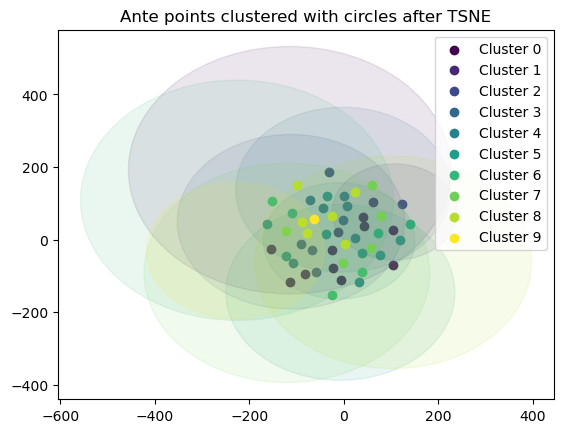

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from matplotlib.patches import Circle


# Cluster centers
centers = kmeans.cluster_centers_

# Train TSNE on ante points with smaller perplexity
tsne = TSNE(n_components=2, perplexity=20)
ante_tsne = tsne.fit_transform(ante)

# Cluster the points of ante using the trained kmeans
ante_cluster_assignments = kmeans.predict(ante)

# Define a colormap for the clusters
cmap = plt.cm.get_cmap('viridis', nn_clusters)

# Transform the cluster centers to 2D using the same t-SNE model
centers_tsne = tsne.fit_transform(centers)

# Plot ante points with cluster assignments and wrap each cluster with a circle
fig, ax = plt.subplots()
for cluster in range(nn_clusters):
    cluster_points = ante_tsne[ante_cluster_assignments == cluster]
    
    if cluster_points.shape[0] > 0:  # Check if there are points assigned to the current cluster
        color = cmap(cluster / (nn_clusters - 1))
        
        # Scatter plot the points in the current cluster
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', color=color)

        # Calculate radius and wrap each cluster with a circle
        center = centers_tsne[cluster]
        radius = np.max(np.linalg.norm(cluster_points - center, axis=1))
        circle = Circle(center[:2], radius, alpha=0.1, color=color)
        ax.add_patch(circle)

ax.set_title("Ante points clustered with circles after TSNE")
ax.legend()
plt.show()


In [32]:
Y_train

array([[8],
       [7],
       [8],
       ...,
       [3],
       [1],
       [3]], dtype=uint8)

In [33]:
a =np.argmax(Y_train)
a

20

In [30]:
a[1]

IndexError: index 1 is out of bounds for axis 0 with size 1